In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import datetime
from utils3 import seasonal_plotter
import os

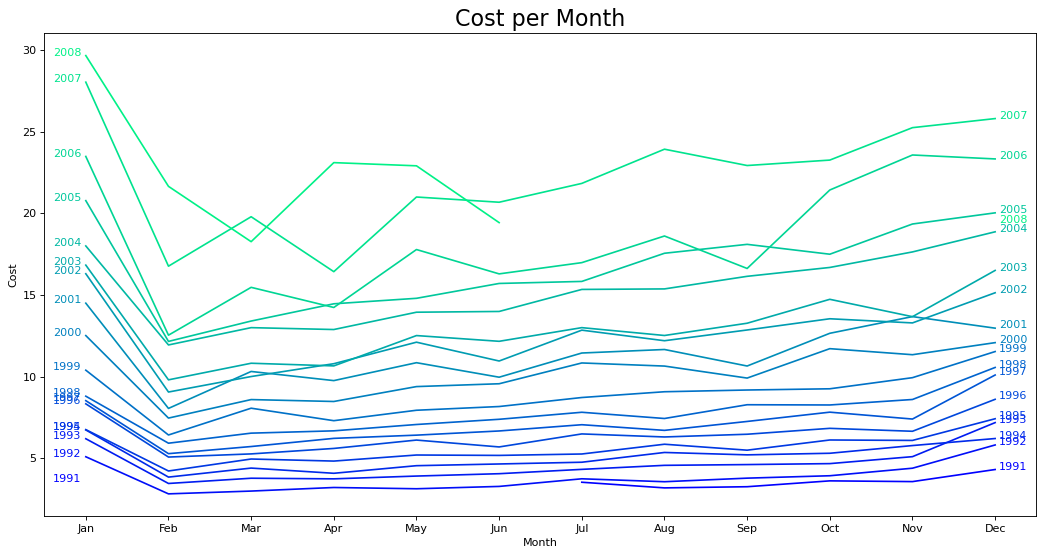

In [2]:
temps = pd.read_csv('../../data/PBS.csv')
temps.columns

def get_month(mtext):
    result=0;
    if mtext == 'Jan': result = 1
    elif mtext == 'Feb': result = 2
    elif mtext == 'Mar': result = 3
    elif mtext == 'Apr': result = 4
    elif mtext == 'May': result = 5
    elif mtext == 'Jun': result = 6
    elif mtext == 'Jul': result = 7
    elif mtext == 'Aug': result = 8
    elif mtext == 'Sep': result = 9
    elif mtext == 'Oct': result = 10
    elif mtext == 'Nov': result = 11
    elif mtext == 'Dec': result = 12
    return result

def extract_month(df):
    df2 = df.map(get_month)
    return df2

a10 = (
    temps
    .drop(['Index'], axis=1)
    .query('ATC2 == \'A10\'')
    .filter(items=['Year', 'Month', 'Concession', 'Type', 'Cost'])
    .assign(Month = lambda x: extract_month(x.Month))
    .assign(Date = lambda x: pd.to_datetime(dict(year=x.Year, month=x.Month, day=1)))
    .drop(['Year', 'Month'], axis=1)
    .set_index('Date')
    .resample('1M')
    .sum()
    .assign(Cost = lambda x: x.Cost/1e6)
)

seasonal_plotter(a10, 'Cost', filename='a10.jpg', period='year')